There is an undirected weighted graph with n vertices labeled from 0 to n - 1.

You are given the integer n and an array edges, where edges[i] = [ui, vi, wi] indicates that there is an edge between vertices ui and vi with a weight of wi.

A walk on a graph is a sequence of vertices and edges. The walk starts and ends with a vertex, and each edge connects the vertex that comes before it and the vertex that comes after it. It's important to note that a walk may visit the same edge or vertex more than once.

The cost of a walk starting at node u and ending at node v is defined as the bitwise AND of the weights of the edges traversed during the walk. In other words, if the sequence of edge weights encountered during the walk is w0, w1, w2, ..., wk, then the cost is calculated as w0 & w1 & w2 & ... & wk, where & denotes the bitwise AND operator.

You are also given a 2D array query, where query[i] = [si, ti]. For each query, you need to find the minimum cost of the walk starting at vertex si and ending at vertex ti. If there exists no such walk, the answer is -1.

Return the array answer, where answer[i] denotes the minimum cost of a walk for query i.

 

Example 1:

Input: n = 5, edges = [[0,1,7],[1,3,7],[1,2,1]], query = [[0,3],[3,4]]

Output: [1,-1]

Explanation:

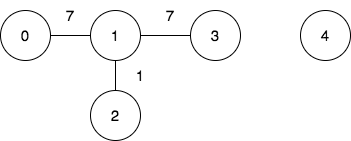

To achieve the cost of 1 in the first query, we need to move on the following edges: 0->1 (weight 7), 1->2 (weight 1), 2->1 (weight 1), 1->3 (weight 7).

In the second query, there is no walk between nodes 3 and 4, so the answer is -1.

Example 2:

Input: n = 3, edges = [[0,2,7],[0,1,15],[1,2,6],[1,2,1]], query = [[1,2]]

Output: [0]

Explanation:

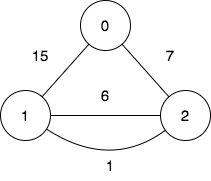

To achieve the cost of 0 in the first query, we need to move on the following edges: 1->2 (weight 1), 2->1 (weight 6), 1->2 (weight 1).

 

Constraints:

    2 <= n <= 105
    0 <= edges.length <= 105
    edges[i].length == 3
    0 <= ui, vi <= n - 1
    ui != vi
    0 <= wi <= 105
    1 <= query.length <= 105
    query[i].length == 2
    0 <= si, ti <= n - 1
    si != ti



In [ ]:
class UF:
    def __init__(self, n):
        self.parents = list(range(n))
        self.degree = [0] * n
        self.costs = [None] * n

    def parent(self, i):
        if self.parents[i] == i:
            return i
        else:
            return self.parent(self.parents[i])

    def union(self, i, j, cost):
        pi = self.parent(i)
        pj = self.parent(j)
        if self.degree[pj] > self.degree[pi]:
            pi, pj = pj, pi
        self.degree[pi] += 1
        self.parents[pj] = pi
        if self.costs[pi] is None and self.costs[pj] is None:
            self.costs[pi] = cost
        elif self.costs[pi] is None:
            self.costs[pi] = cost & self.costs[pj]
        elif self.costs[pj] is None:
            self.costs[pi] = cost & self.costs[pi]
        else:
            self.costs[pi] = cost & self.costs[pi] & self.costs[pj]

    def find(self, i, j):
        pi = self.parent(i)
        pj = self.parent(j)
        if pi == pj:
            return self.costs[pi]
        else:
            return -1


class Solution:
    def minimumCost(self, n: int, edges: List[List[int]], query: List[List[int]]) -> List[int]:
        uf = UF(n)
        for i, j, cost in edges:
            uf.union(i, j, cost)
        return [uf.find(i, j) for (i, j) in query]